In [1]:
import pandas as pd
import numpy as np

In [2]:
#Use data from step tracking application to create panadas series                             

step_data=[3620,7891,9761,3907,4338,5373]
step_counts=pd.Series(step_data,name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [3]:
#Add a data range to the Series.

step_counts.index=pd.date_range('20200402',periods=6)
print(step_counts)

2020-04-02    3620
2020-04-03    7891
2020-04-04    9761
2020-04-05    3907
2020-04-06    4338
2020-04-07    5373
Freq: D, Name: steps, dtype: int64


In [4]:
#Select data by index values 
#just like a dictionary

print(step_counts['2020-04-05'])

3907


In [5]:
#By index position like an array

print(step_counts[3])

3907


In [6]:
#Convert to a float

step_counts=step_counts.astype(np.float)

#View data type

print(step_counts.dtypes)

float64


In [7]:
# Create invalid data

step_counts[1:3]=np.NaN

#Now fill it with zeros

step_counts=step_counts.fillna(0.)
print(step_counts[1:3])

2020-04-03    0.0
2020-04-04    0.0
Freq: D, Name: steps, dtype: float64


In [8]:
#PANDAS DATAFRAME CREATION AND METHODS.
#dataframe can be created from list ,dictionary ,Pandas Series.

In [9]:
#cycling distance

cycling_data=[10.7,0,None,2.4,15.3,10.9,0,None]

#Create a tuple of data

joined_data=list(zip(step_data,cycling_data))

#The dataframe

activity_df=pd.DataFrame(joined_data)
print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [10]:
#Add a column names to dataframe 

activity_df=pd.DataFrame(joined_data,index=pd.date_range('20200402',periods=6),columns=['Walking','Cycling'])
print(activity_df)

            Walking  Cycling
2020-04-02     3620     10.7
2020-04-03     7891      0.0
2020-04-04     9761      NaN
2020-04-05     3907      2.4
2020-04-06     4338     15.3
2020-04-07     5373     10.9


In [11]:
#Reading Data With Pandas
#The location of the data file

filepath='Iris_Data.csv'

#Import the Data

data=pd.read_csv(filepath)

print(data.iloc[ : 5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [12]:
#Assigning new data to a dataframe
#create a new column that is product of both measurement

data['sepal_area']=data.sepal_length*data.sepal_width
print(data.iloc[:5,-3:])

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


In [13]:
#Applying a function to a dataframe column

data['abbrev']=(data.species.apply(lambda x:x.replace('Iris-','')))
print(data.iloc[:5,-3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [14]:
#Concatenating Two dataframes
#1st two and lazt two

small_data=pd.concat([data.iloc[:2],data.iloc[-2:]])
print(small_data.iloc[:,-3:])

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


In [15]:
#Use the size method with a dataframe to get count for a series use  the value_count method

group_sizes=(data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [16]:
#Mean calculated on a Dataframe

print(data.mean())

#median calculated on series

print(data.petal_length.median())

#mode calculated on series

print(data.petal_length.mode())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35
0    1.5
dtype: float64


In [17]:
#Performing Statistical calculation
#standard deviation,variances,SEM,and quatiles can be calculated

print(data.petal_length.std(),
      data.petal_length.var(),
      data.petal_length.sem(),
      data.quantile(0))


1.7644204199522626 3.113179418344519 0.1440643240210085 sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [18]:
#multiple calculations
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [19]:
#Sampling from DataFrame 
#Samle 5 rows without replacement

sample=(data.sample(n=5,replace=False,random_state=42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


In [20]:
#VISUALIZATION LIBRARIES
#Visualization can be created in multiple ways 
#Matplotlib
#Pandas (via Matplotlib)
#seaborn

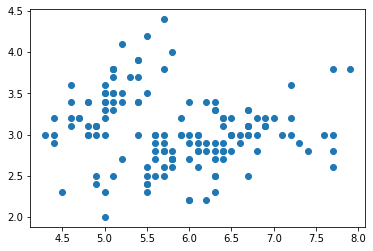

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data.sepal_length,data.sepal_width,ls='',marker='o')
plt.show()

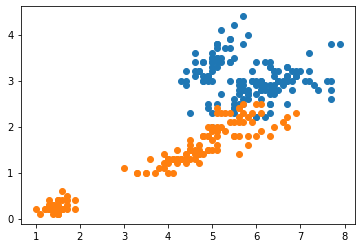

In [22]:
#Multiple layers can also be added
plt.plot(data.sepal_length,data.sepal_width,ls='',marker='o',label='sepal')
plt.plot(data.petal_length,data.petal_width,ls='',marker='o',label='petal')
plt.show()

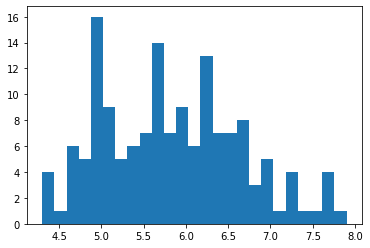

In [23]:
#Histograms with matlplotlib
plt.hist(data.sepal_length,bins=25)
plt.show()

[Text(0, 0.5, 'ylabel'), Text(0.5, 0, 'xlabel'), Text(0.5, 1.0, 'Title')]

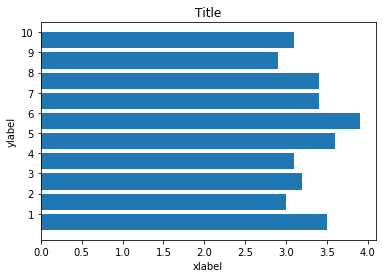

In [24]:
#Customizing Matplotlib plots

fig,ax=plt.subplots()
ax.barh(np.arange(10),data.sepal_width.iloc[:10])

#Set positions of ticks and tick labels

ax.set_yticks(np.arange(0.4,10.4,1.0))
ax.set_yticklabels(np.arange(1,11))
ax.set(xlabel='xlabel',ylabel='ylabel',title='Title')

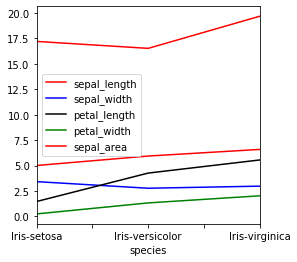

In [25]:
#Incoporating statistical calculations
(data.groupby('species').mean().plot(color=['red','blue','black','green'],
                                     fontsize=10.0,figsize=(4,4)))


In [26]:
#Statistical ploting with seaborn

import seaborn as sns

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


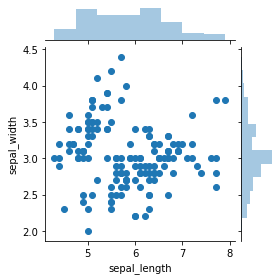

In [27]:
sns.jointplot(x='sepal_length',y='sepal_width',data=data,size=4)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


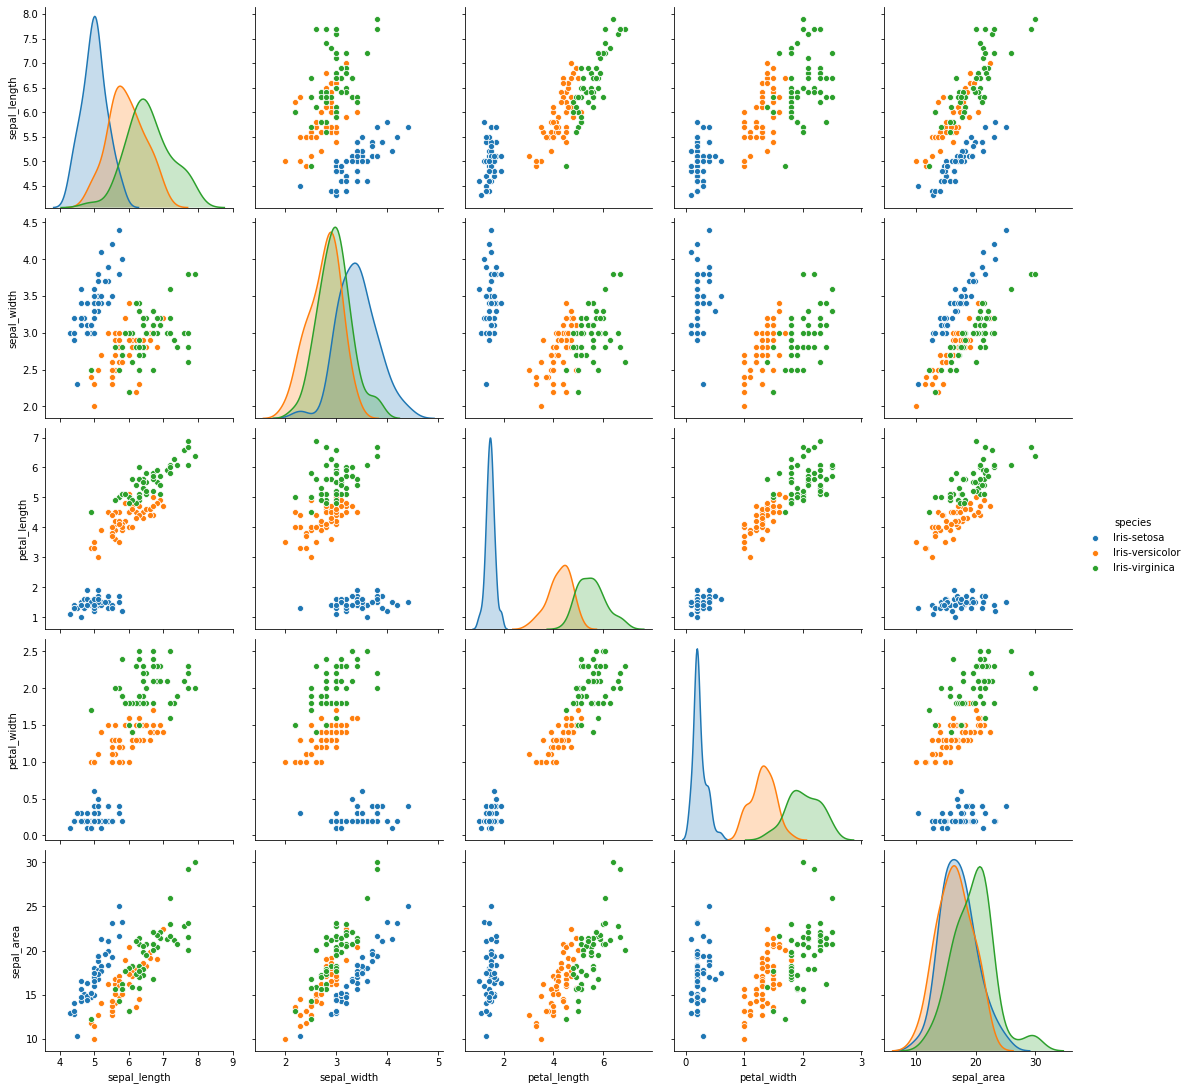

In [28]:
#Correlation plots of all variables pairew can also be done
sns.pairplot(data,hue='species',size=3)